In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import seaborn as sns

Text(0, 0.5, 'Fitness')

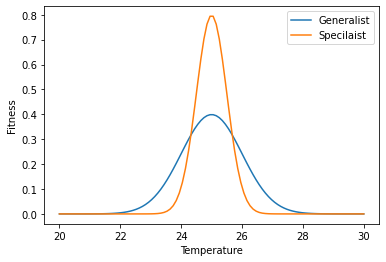

In [2]:
# Fitness curve for species A and B, which are generalist and specialist, respectively.
mu = 25
sigma_A, sigma_B = 1, 0.5

X = np.linspace(20, 30, 100)

fig , ax = plt.subplots()
plt.plot(X, stats.norm.pdf(X, mu, sigma_A), label='Generalist')
plt.plot(X, stats.norm.pdf(X, mu, sigma_B), label='Specilaist')
plt.legend(loc='upper right') 
plt.xlabel('Temperature')
plt.ylabel('Fitness')

In [3]:
def generate_environment(short_sigma, long_sigma, mu=mu):
    df = pd.DataFrame({})
    generations = np.random.normal(mu, long_sigma, 10)
    for i, gen in enumerate(generations):
        df[i] = np.random.normal(gen, short_sigma, 5)
    return df

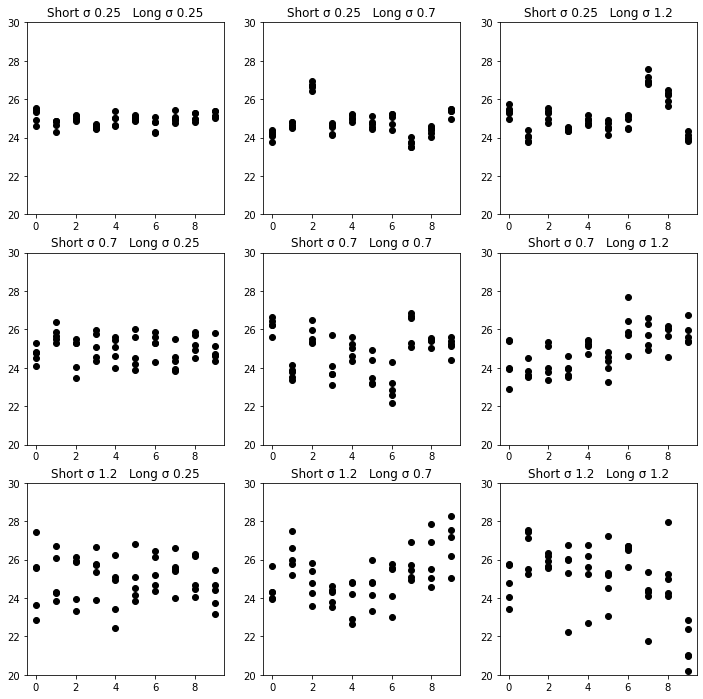

In [4]:
sigmas = [0.25, 0.7, 1.2]
dfs = [[[], [], []], [[], [], []], [[], [], []]]

fig, axs = plt.subplots(3, 3, figsize=(12,12))

for i, short in enumerate(sigmas):
    for j, long in enumerate(sigmas):
        dfs[i][j] = generate_environment(short, long, mu=mu)
        axs[i, j].plot(dfs[i][j].T, 'ko')
        axs[i, j].set_ylim([20, 30])
        axs[i, j].set_title('Short σ '+ str(short) + '   Long σ ' + str(long))



In [5]:
for i, short in enumerate(sigmas):
    for j, long in enumerate(sigmas):
        A_score = stats.gmean(stats.norm.pdf(dfs[i][j], mu, sigma_A).sum(axis=0))
        B_score = stats.gmean(stats.norm.pdf(dfs[i][j], mu, sigma_B).sum(axis=0))
        print('Short:', short, '\tLong', long, '\t',  ('Generalist wins' if A_score > B_score else 'Specialist wins'))

Short: 0.25 	Long 0.25 	 Specialist wins
Short: 0.25 	Long 0.7 	 Generalist wins
Short: 0.25 	Long 1.2 	 Generalist wins
Short: 0.7 	Long 0.25 	 Specialist wins
Short: 0.7 	Long 0.7 	 Generalist wins
Short: 0.7 	Long 1.2 	 Specialist wins
Short: 1.2 	Long 0.25 	 Generalist wins
Short: 1.2 	Long 0.7 	 Specialist wins
Short: 1.2 	Long 1.2 	 Generalist wins


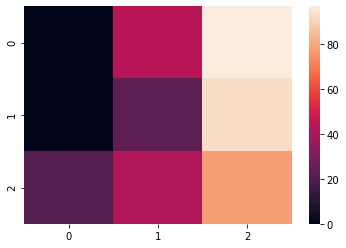

In [6]:
dfs = [[[] for i in sigmas] for i in sigmas]
bar = [[0 for i in sigmas] for i in sigmas]

#fig, axs = plt.subplots(3, 3, figsize=(12,12))
for epoch in range(100):
    for i, short in enumerate(sigmas):
        for j, long in enumerate(sigmas):
            dfs[i][j] = generate_environment(short, long, mu=mu)
            A_score = stats.gmean(stats.norm.pdf(dfs[i][j], mu, sigma_A).sum(axis=0))
            B_score = stats.gmean(stats.norm.pdf(dfs[i][j], mu, sigma_B).sum(axis=0))
            if A_score > B_score:
                bar[i][j] += 1
                
ax = sns.heatmap(bar)

In [7]:
sigmas = np.add(list(range(20)), 1)/10
bar = [[0 for i in sigmas] for i in sigmas]
dfs = [[[] for i in sigmas] for i in sigmas]

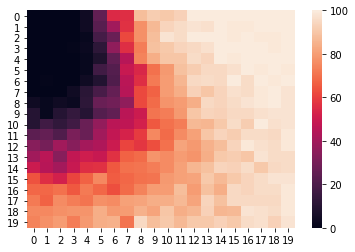

In [8]:
for epoch in range(100):
    for i, short in enumerate(sigmas):
        for j, long in enumerate(sigmas):
            dfs[i][j] = generate_environment(short, long, mu=mu)
            A_score = stats.gmean(stats.norm.pdf(dfs[i][j], mu, sigma_A).sum(axis=0))
            B_score = stats.gmean(stats.norm.pdf(dfs[i][j], mu, sigma_B).sum(axis=0))
            if A_score > B_score:
                bar[i][j] += 1
                
ax = sns.heatmap(bar)
